<a href="https://colab.research.google.com/github/judhacdc/PCVK_Genap_2023/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


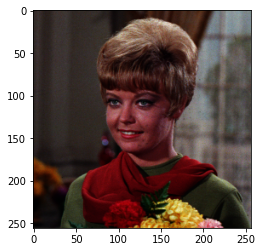

In [117]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

img = cv.imread('/content/drive/MyDrive/Images/female.tiff')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

#1.	Buat Gamma Correction  

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 2


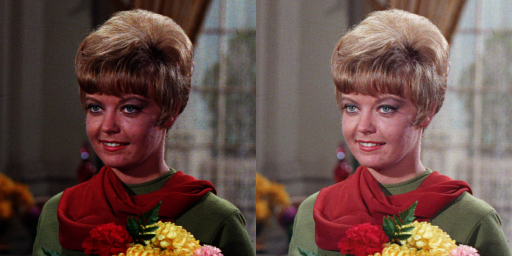

In [118]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try: 
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)
     
final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

#2.	Buat Simulasi Image Depth

 Bit Depth pada Citra [STATIS]
---------------------------------


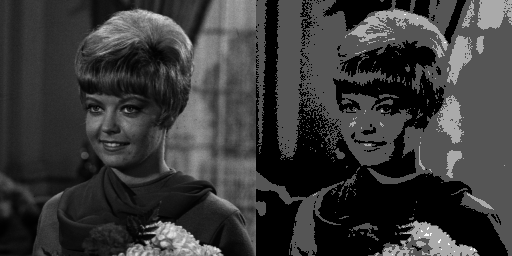

In [119]:
print(' Bit Depth pada Citra [STATIS]')
print('---------------------------------')

bit_depth=2
level = 255 / (pow(2,bit_depth)-1) 
original = cv.imread("/content/drive/MyDrive/Images/female.tiff", cv.IMREAD_GRAYSCALE)

bit_depth_image = np.zeros(original.shape, original.dtype)

#akses per piksel -> hanya 2 loop karena greyscale hanya 2 matriks
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
       bit_depth_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255)

final_frame = cv.hconcat((original, bit_depth_image))
cv2_imshow(final_frame)

 Bit Depth pada Citra [DINAMIS]
---------------------------------
Masukkan nilai bit depth: 3


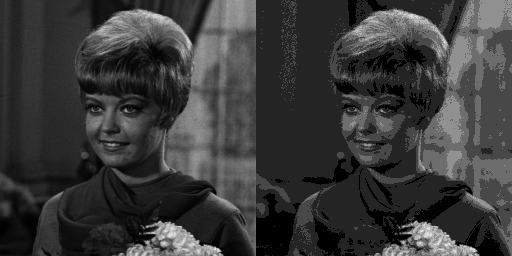

In [120]:
print(' Bit Depth pada Citra [DINAMIS]')
print('---------------------------------')

try:
  bd = float(input('Masukkan nilai bit depth: '))
except ValueError:
  print('Error, not a number')

bit_depth = 2**bd
level = 255 / (bit_depth - 1)



original = cv.imread("/content/drive/MyDrive/Images/female.tiff", cv.IMREAD_GRAYSCALE)

bit_depth_image = np.zeros(original.shape, original.dtype)

#akses per piksel -> hanya 2 loop karena greyscale hanya 2 matriks
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
       bit_depth_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255)

final_frame = cv.hconcat((original, bit_depth_image))
cv2_imshow(final_frame)




#3.	Buat modul Average Denoising

**Nomor 3 (citra: 5)**

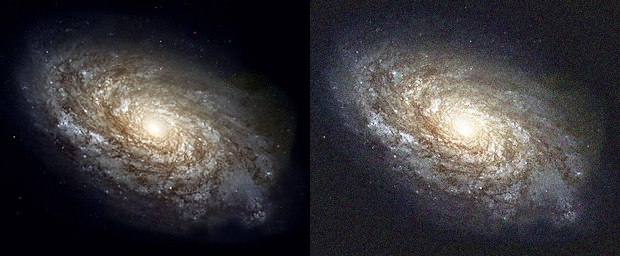

Nilai PSNR adalah 27.529985217621444 (dB)
Nilai MSE adalah 114.83700016801075


In [121]:
import glob
from math import log10, sqrt
  
original = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0): 
        return 100, mse
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr, mse


compressed = dst
psnr = PSNR(original, compressed)
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


psnr, mse = PSNR(original, compressed)
print('Nilai PSNR adalah', psnr, '(dB)')
print('Nilai MSE adalah', mse)

**Nomor 3 (citra: 30)**

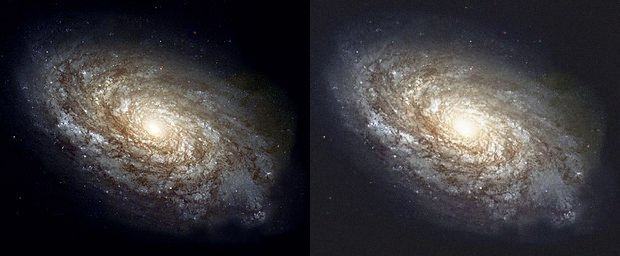

Nilai PSNR adalah 27.524015238515915 (dB)
Nilai MSE adalah 114.99496807795698


In [122]:
import glob
from math import log10, sqrt
  
original = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 29 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0): 
        return 100, mse
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr, mse


compressed = dst
psnr = PSNR(original, compressed)
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


psnr, mse = PSNR(original, compressed)
print('Nilai PSNR adalah', psnr, '(dB)')
print('Nilai MSE adalah', mse)

**Nomor 3 (citra: 60)**

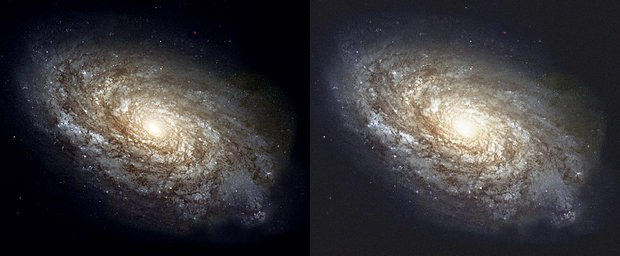

Nilai PSNR adalah 27.494021105778614 (dB)
Nilai MSE adalah 115.7919186827957


In [123]:
import glob
from math import log10, sqrt
  
original = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 59 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0): 
        return 100, mse
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr, mse


compressed = dst
psnr = PSNR(original, compressed)
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


psnr, mse = PSNR(original, compressed)
print('Nilai PSNR adalah', psnr, '(dB)')
print('Nilai MSE adalah', mse)

**Nomor 3 (citra: 80)**

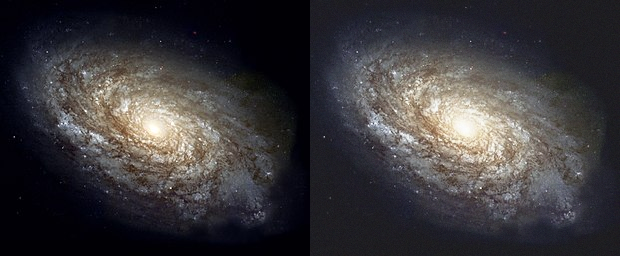

Nilai PSNR adalah 27.500613682936873 (dB)
Nilai MSE adalah 115.61628024193548


In [124]:
import glob
from math import log10, sqrt
  
original = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 79 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0): 
        return 100, mse
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr, mse


compressed = dst
psnr = PSNR(original, compressed)
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


psnr, mse = PSNR(original, compressed)
print('Nilai PSNR adalah', psnr, '(dB)')
print('Nilai MSE adalah', mse)

**Nomor 3 (citra: 100)**

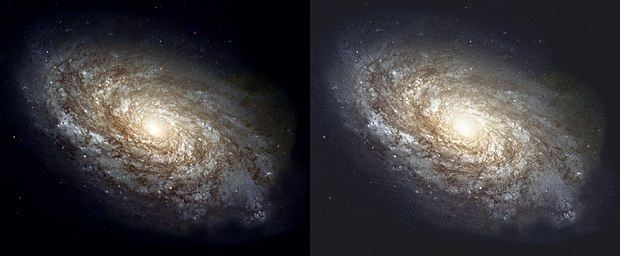

Nilai PSNR adalah 27.51012776595877 (dB)
Nilai MSE adalah 115.36327704973118


In [125]:
import glob
from math import log10, sqrt
  
original = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 99 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0): 
        return 100, mse
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr, mse


compressed = dst
psnr = PSNR(original, compressed)
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


psnr, mse = PSNR(original, compressed)
print('Nilai PSNR adalah', psnr, '(dB)')
print('Nilai MSE adalah', mse)

#4.	Buat image masking untuk image berikut. Image kiri adalah image asli (images/teeth.jpg), sedangkan image kanan adalah hasilnya:

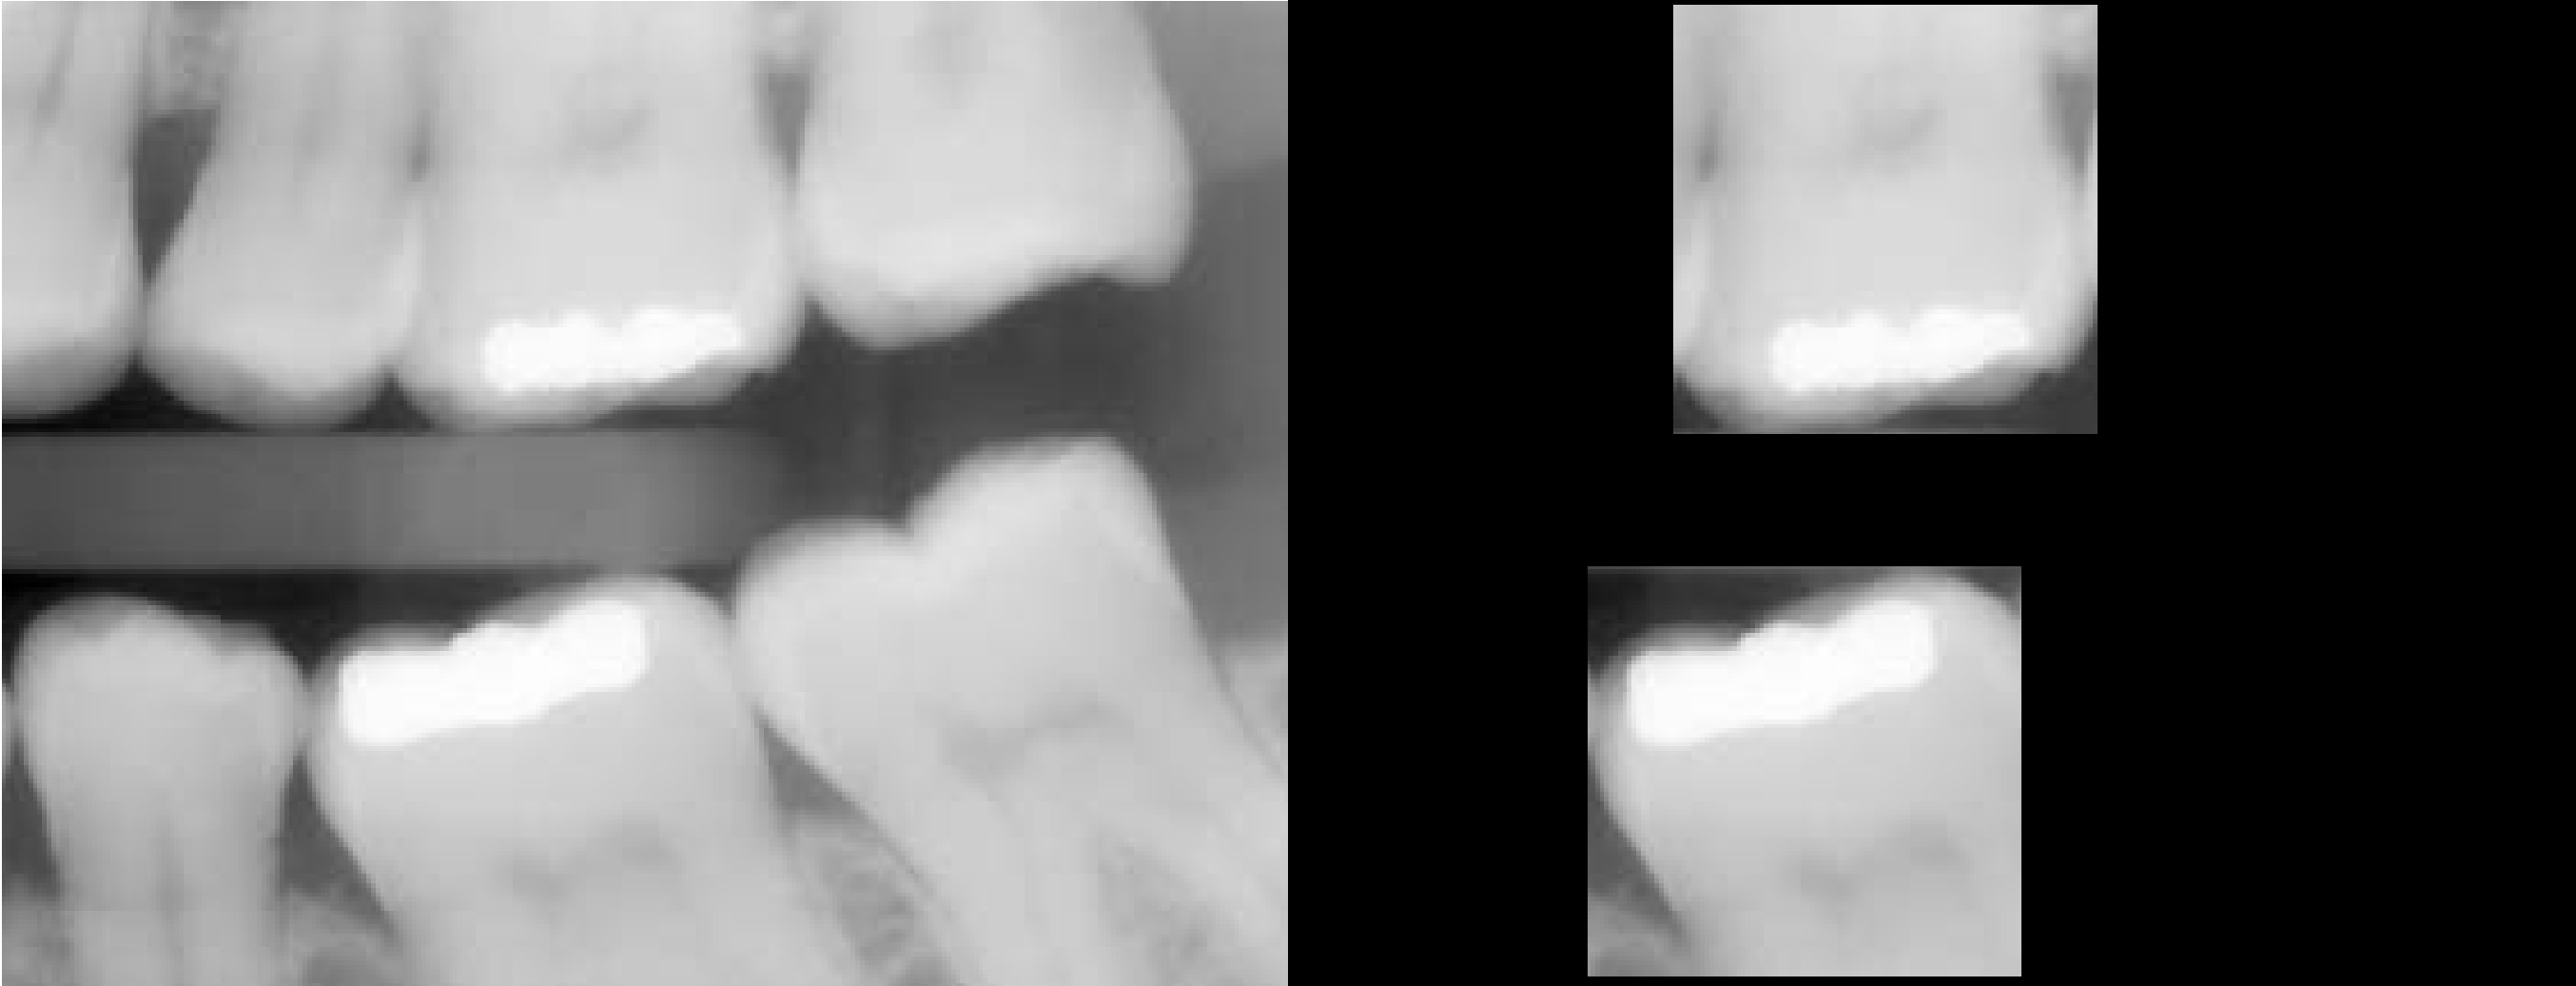

In [126]:
img_t = cv.imread('/content/drive/MyDrive/Images/teeth.jpg')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(315,595),pt2=(770,1025),color=(255,255,255),thickness=-1)

result = img_t & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result = img_t & mask1

teeth_frame = cv.hconcat((img_t, result))
cv2_imshow(teeth_frame)

resolusi image : height x width  256  x  256


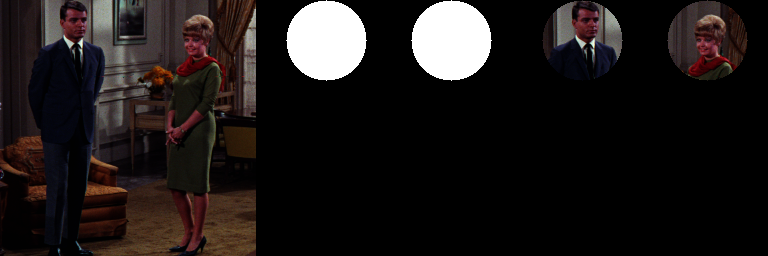

In [135]:
img_t = cv.imread('/content/drive/MyDrive/Images/couple.tiff')

height = img_couple.shape[0]
width = img_couple.shape[1]
print("resolusi image : height x width ", height, " x ",width)

mask = np.zeros(img_t.shape, img_t.dtype)
mask = cv.circle(mask, (70, 40), 40, (255,255,255), -1)

result = img_t & mask

mask1 = cv.circle(mask, (195, 40), 40, (255,255,255), -1)

result = img_t & mask1

final_frame = cv.hconcat((img_t, mask, result))
cv2_imshow(final_frame)

#5.	Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini

In [136]:
#import gambar yang akan di gunakan terlebih dahulu
img_rose = cv.imread('/content/drive/MyDrive/Images/rose_pink.png')

#OR

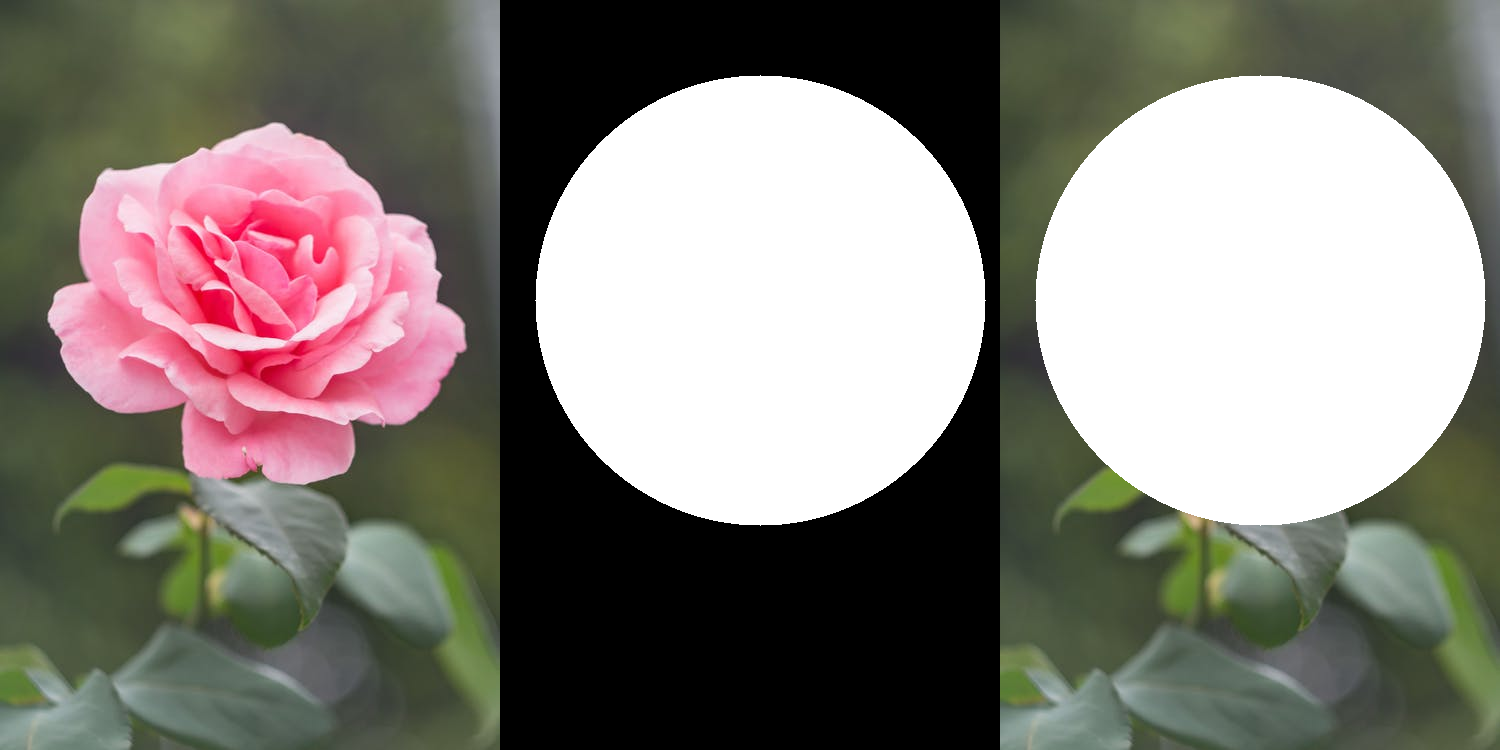

In [137]:
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose | mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

#NOT

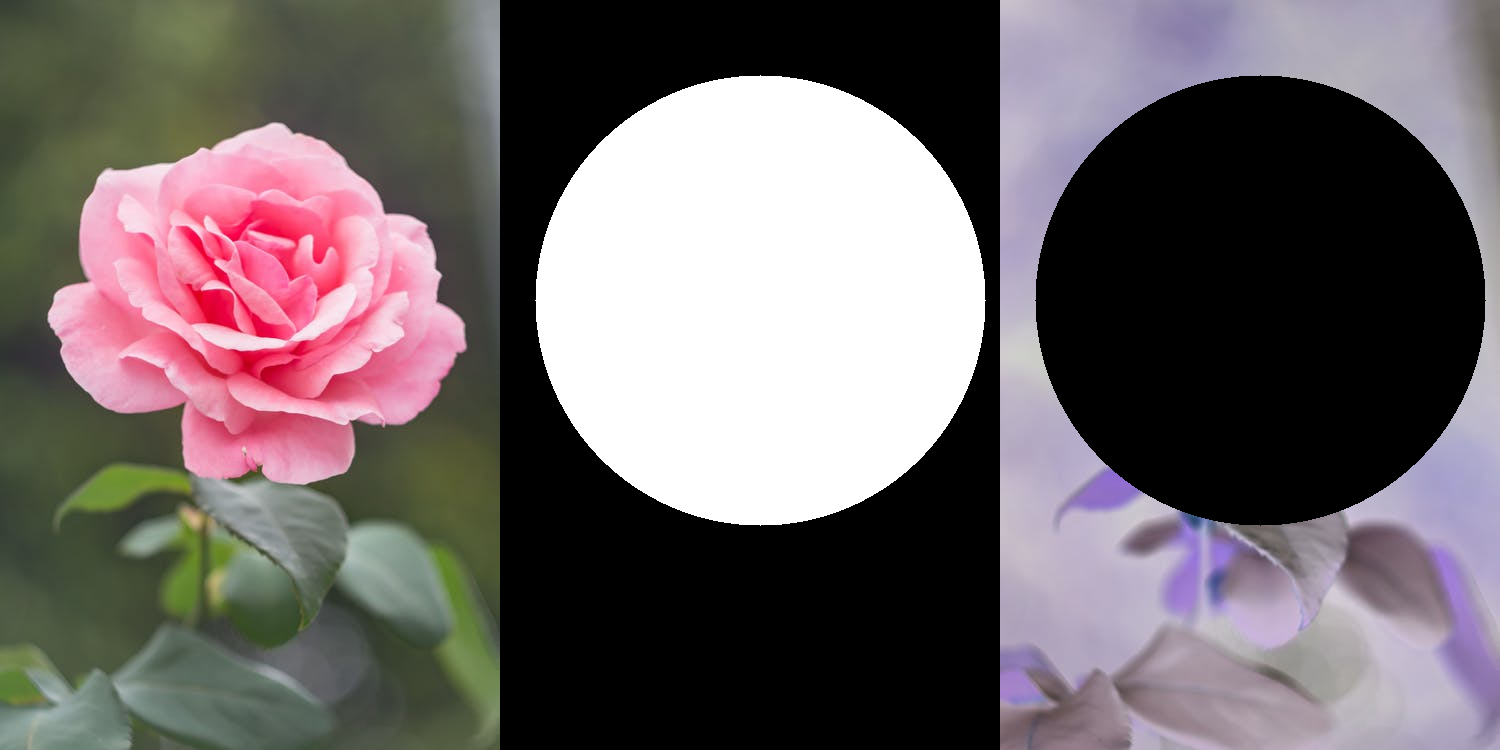

In [138]:
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose & ~mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

#NAND

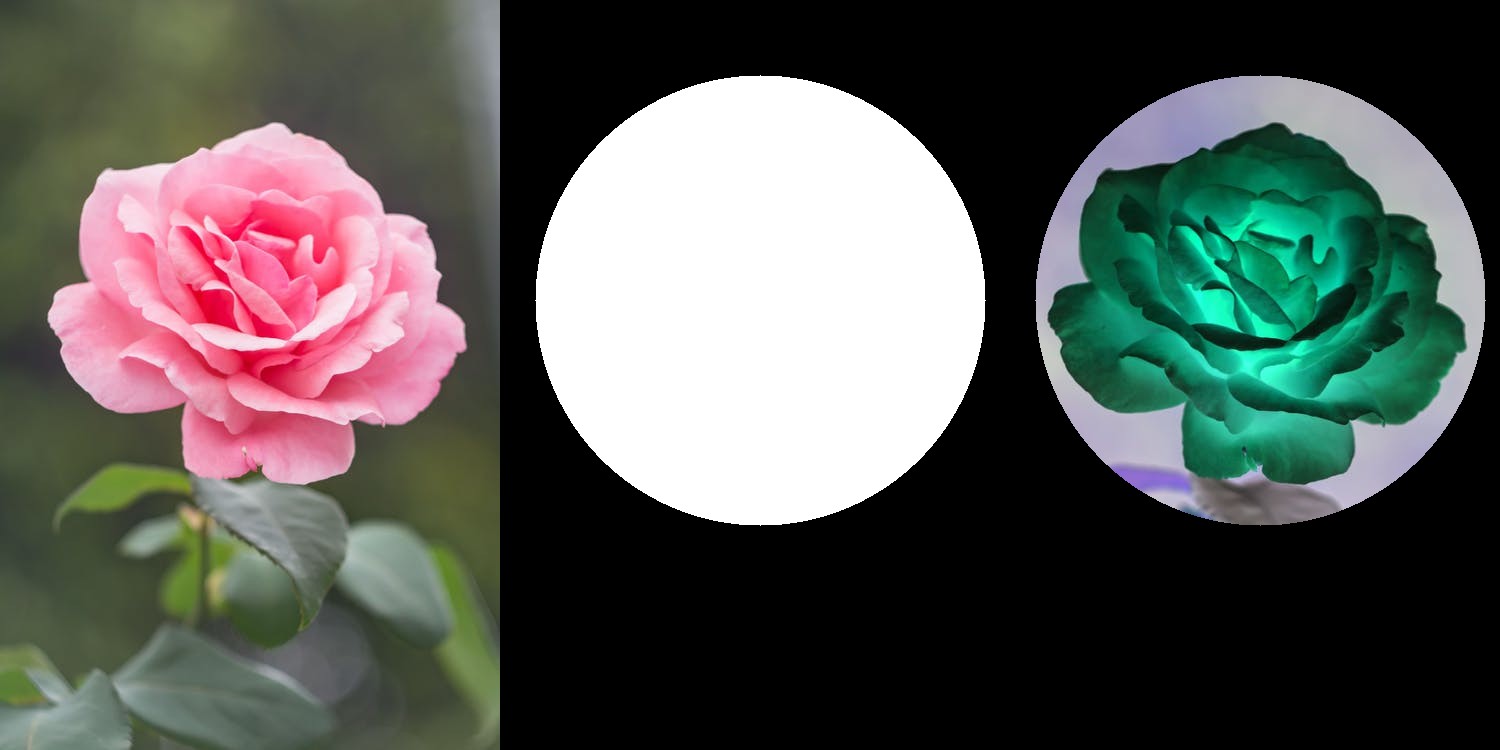

In [139]:
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose & mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

#XOR

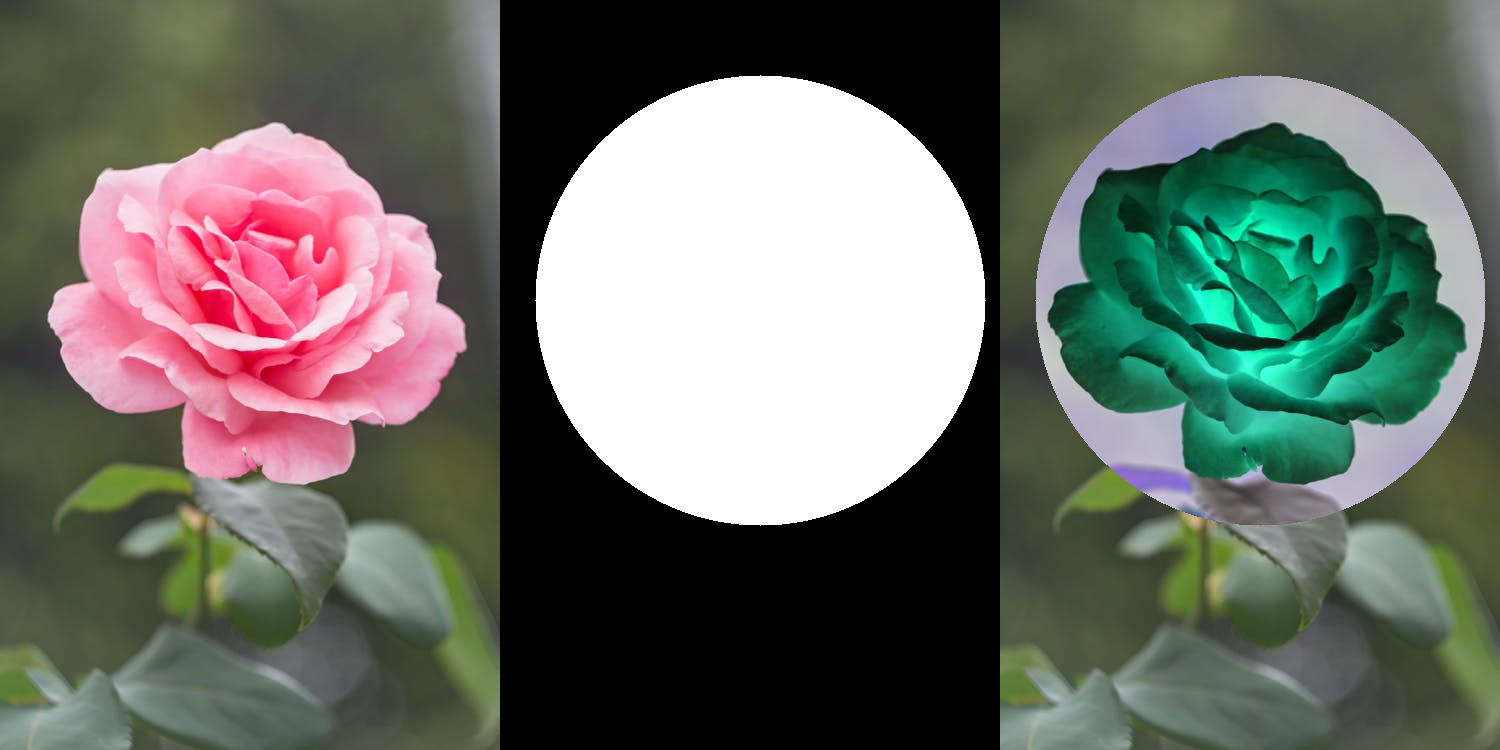

In [140]:
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose ^ mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

#AND

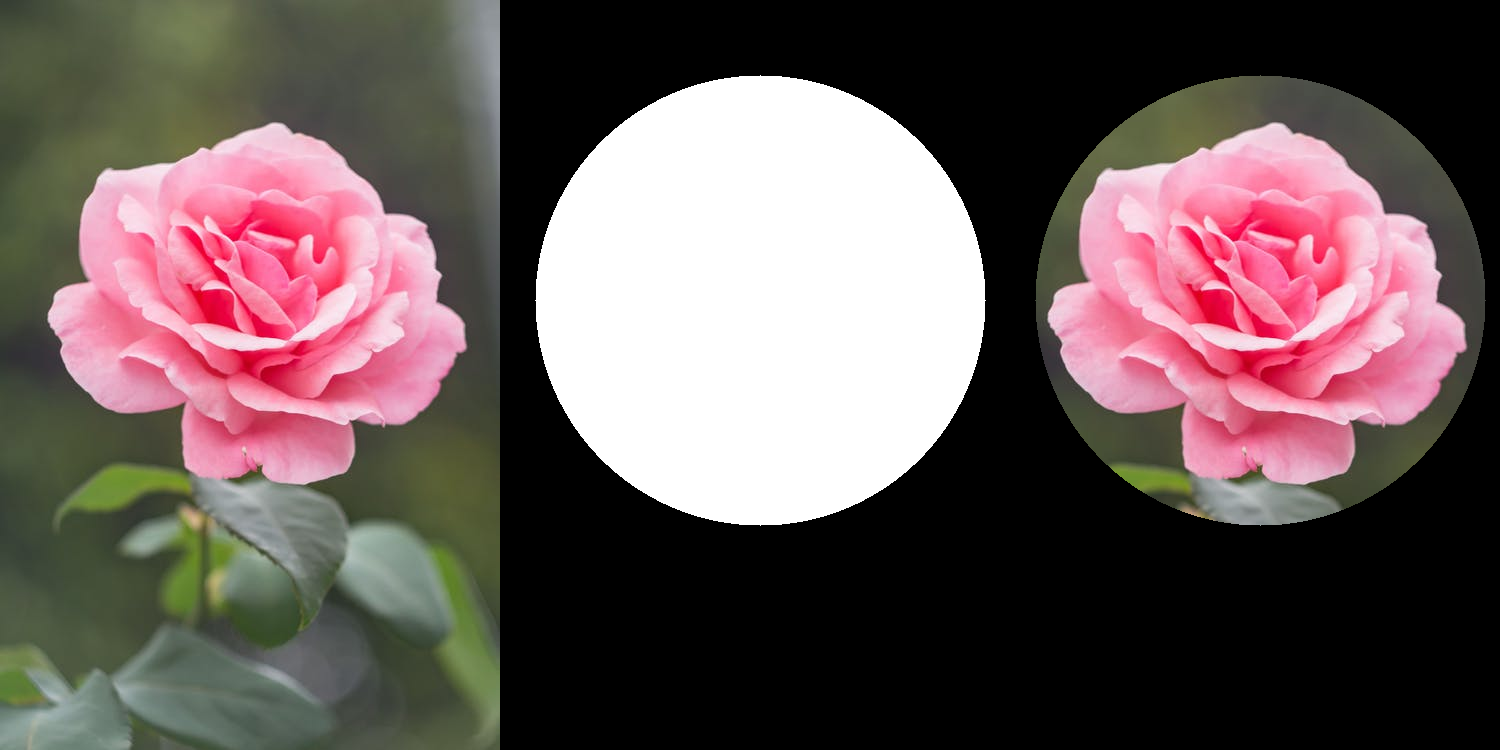

In [141]:
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose & mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)